In [1]:

import time
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime, timedelta

def clean_text(text):
    text = text.encode('ascii', 'ignore').decode('ascii')
    return text.strip()

def clean_text_no_span(tag):
    for span in tag.find_all('span'):
        span.decompose()
    text = tag.get_text(strip=True).encode('ascii', 'ignore').decode('ascii')
    return text.strip()

def scrape_weather_data(date, city):
    url = (f'https://www.timeanddate.com/weather/vietnam/{city}/historic'
           f'?month={date.month}&year={date.year}&hd={date.strftime("%Y%m%d")}')

    response = requests.get(url)
    response.encoding = 'utf-8'
    soup = BeautifulSoup(response.content, 'html.parser')

    weather_table = soup.find('table', {'class': 'zebra tb-wt fw va-m tb-hover'})
    if not weather_table:
        print(f"Không tìm thấy dữ liệu cho ngày {date} tại thành phố {city.capitalize()}")
        return []

    rows = weather_table.find_all('tr')[2:]
    weather_data = []

    for row in rows:
        columns = row.find_all(['th', 'td'])
        if len(columns) < 2:
            continue

        time = clean_text_no_span(columns[0])
        temperature = clean_text(columns[2].text.strip())
        weather_condition = clean_text(columns[3].text.strip())
        wind = clean_text(columns[4].text.strip())
        humidity = clean_text(columns[6].text.strip()) if len(columns) > 6 else None
        barometer = clean_text(columns[7].text.strip()) if len(columns) > 7 else None
        visibility = clean_text(columns[8].text.strip()) if len(columns) > 8 else None

        # print(f"Thời gian: {time}, Nhiệt độ: {temperature}, Thời tiết: {weather_condition}, Gió: {wind}, "
        #       f"Độ ẩm: {humidity}, Áp suất: {barometer}, Tầm nhìn: {visibility}")

        weather_data.append({
            'city': city.capitalize(),
            'date': date.strftime('%Y-%m-%d'),
            'time': time,
            'temperature': temperature,
            'weather_condition': weather_condition,
            'wind': wind,
            'humidity': humidity,
            'barometer': barometer,
            'visibility': visibility
        })

    return weather_data

all_weather_data = []

cities = ['hanoi','ho-chi-minh','da-nang','nha-trang']
# start_date = datetime.now() - timedelta(days=14)
# end_date = datetime.now()

start_date = datetime.now()-timedelta(days=14)
end_date = datetime.now()

for city in cities:
    date = start_date
    while date <= end_date:
        weather_data = scrape_weather_data(date, city)
        if weather_data:
            all_weather_data.extend(weather_data)
        date += timedelta(days=1)

if all_weather_data:
    df = pd.DataFrame(all_weather_data)
    df.to_csv('weather_data.csv', index=False)
else:
    print("Không có dữ liệu nào để lưu.")
data = pd.read_csv('weather_data.csv')
data

,city,date,time,temperature,weather_condition,wind,humidity,barometer,visibility
0,Hanoi,2024-12-08,12:00 am,64F,Overcast.,12 mph,64%,"30.18 ""Hg",NaN
1,Hanoi,2024-12-08,12:30 am,63F,Overcast.,12 mph,68%,"30.15 ""Hg",NaN
2,Hanoi,2024-12-08,1:00 am,63F,Overcast.,13 mph,68%,"30.15 ""Hg",NaN
3,Hanoi,2024-12-08,1:30 am,63F,Light rain. Mostly cloudy.,12 mph,68%,"30.15 ""Hg",NaN
4,Hanoi,2024-12-08,2:00 am,63F,Overcast.,9 mph,68%,"30.15 ""Hg",NaN
...,...,...,...,...,...,...,...,...,...
1162,Nha-trang,2024-12-15,10:00 am,78F,Sprinkles. Overcast.,13 mph,89%,"29.97 ""Hg",6mi
1163,Nha-trang,2024-12-15,1:00 pm,77F,Overcast.,9 mph,87%,"29.95 ""Hg",9mi
1164,Nha-trang,2024-12-15,4:00 pm,77F,Overcast.,6 mph,87%,"29.93 ""Hg",9mi
1165,Nha-trang,2024-12-15,7:00 pm,77F,Sprinkles. Overcast.,8 mph,86%,"29.97 ""Hg",6mi


TEST data


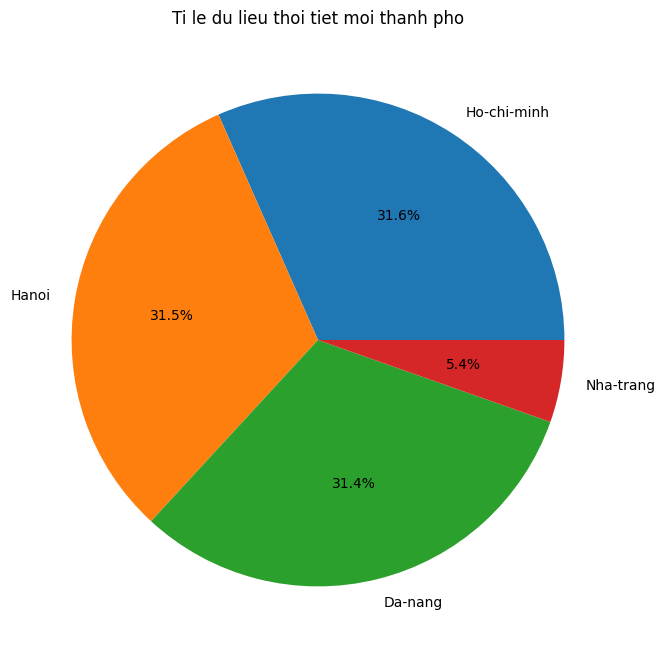

           city  day  temperature       wind   humidity  barometer  visibility
0       Da-nang    8    75.425532   5.021739  81.425532  30.027234    5.000000
1       Da-nang    9    76.162791   5.853659  81.441860  29.974419    5.000000
2       Da-nang   10    77.659574   4.777778  81.638298  29.904681    5.000000
3       Da-nang   11    74.068182   7.380952  94.681818  29.904318    2.848485
4       Da-nang   12    76.478261   6.760870  88.065217  29.910217    3.666667
5       Da-nang   13    75.510638   8.446809  90.000000  29.964681    4.193548
6       Da-nang   14    73.042553  10.468085  88.531915  30.071277    3.682927
7       Da-nang   15    67.869565  15.108696  93.086957  30.142826    2.942857
8         Hanoi    8    62.936170   7.638298  65.212766  30.168511         NaN
9         Hanoi    9    64.558140   3.813953  67.790698  30.067209    4.357143
10        Hanoi   10    68.586957   4.065217  78.195652  29.943478    2.500000
11        Hanoi   11    66.000000   8.108696  80.065

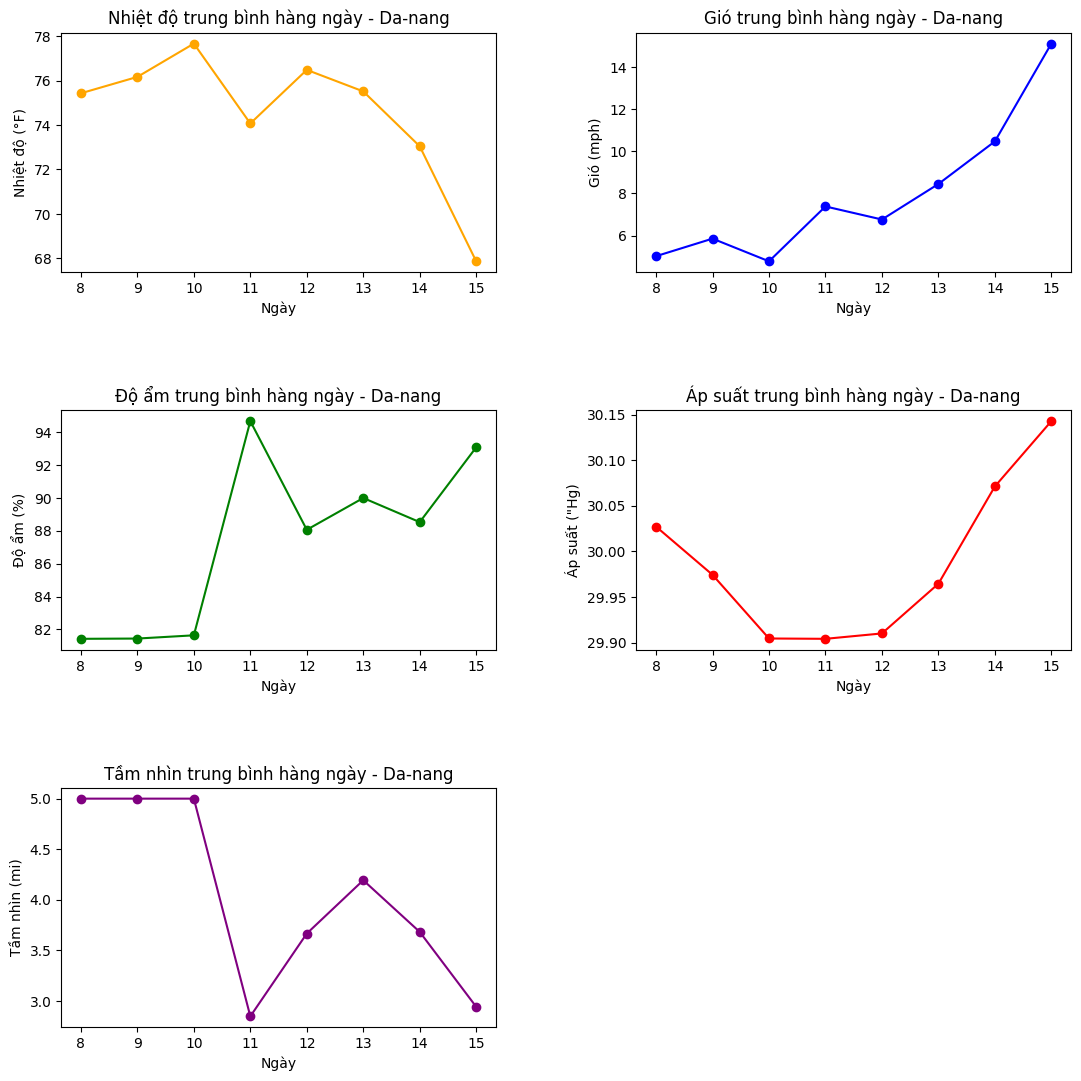

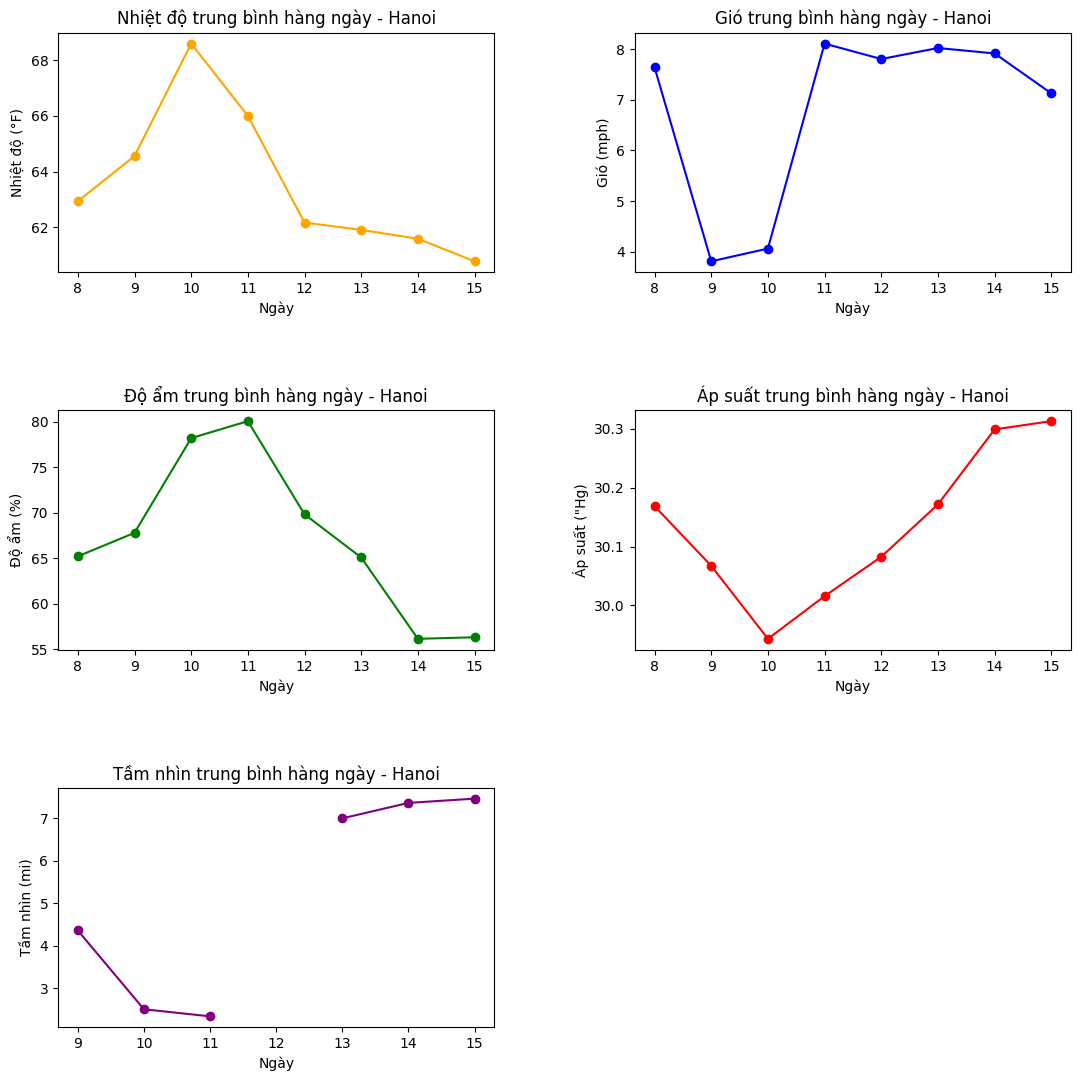

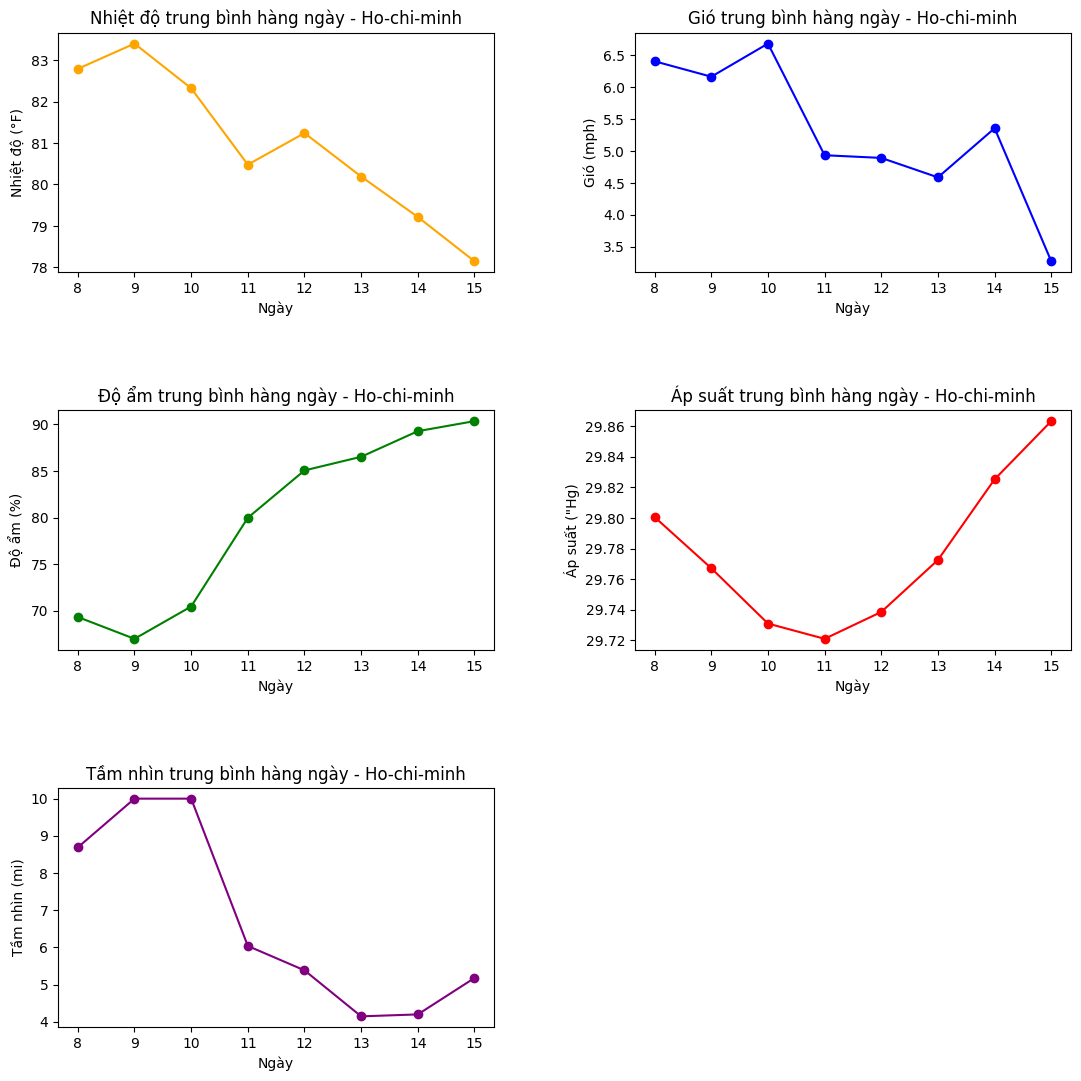

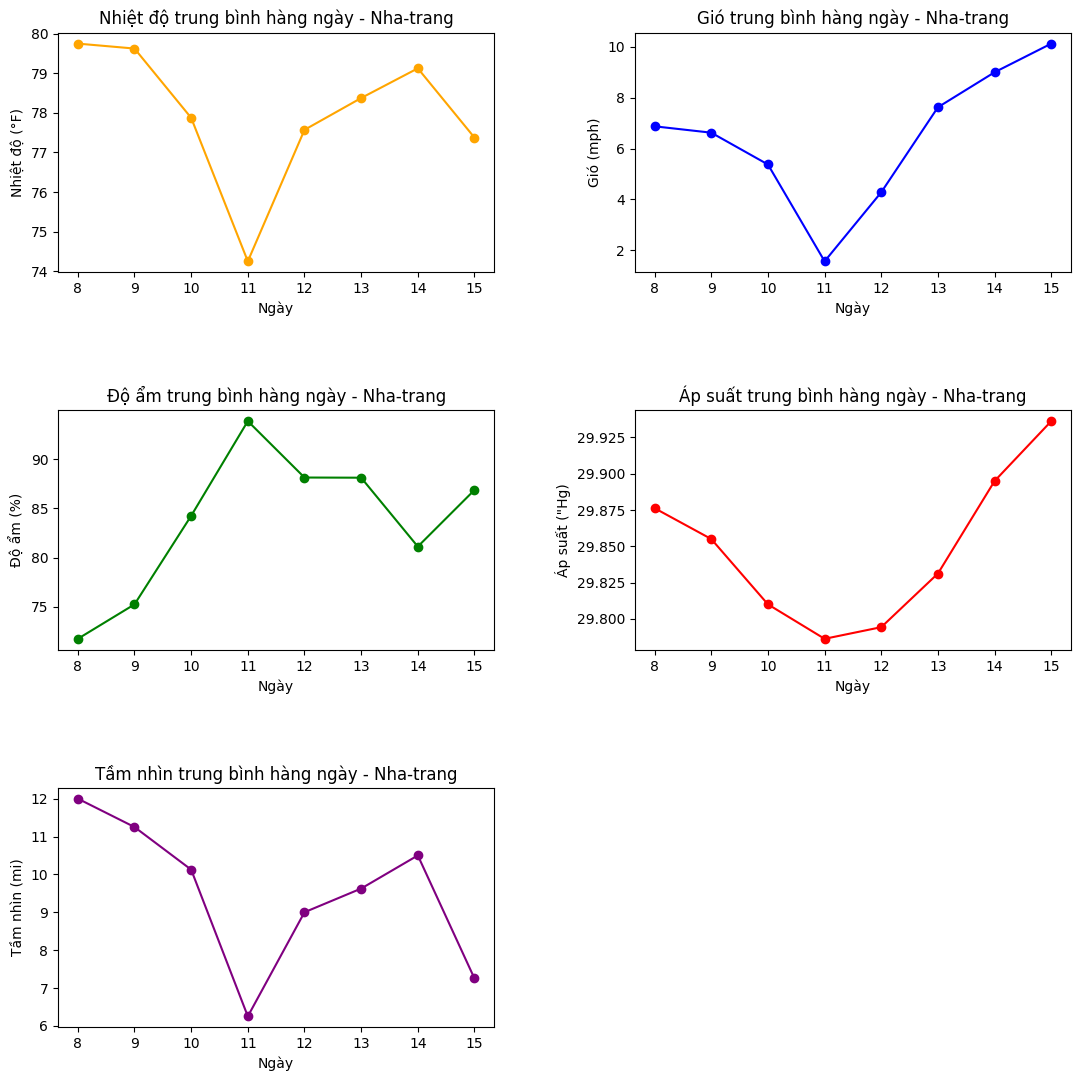

             temperature      wind  humidity  barometer  visibility
temperature     1.000000 -0.250838  0.321693  -0.728875   -0.605827
wind           -0.250838  1.000000 -0.332396   0.287610    0.415611
humidity        0.321693 -0.332396  1.000000  -0.678085   -0.835303
barometer      -0.728875  0.287610 -0.678085   1.000000    0.744847
visibility     -0.605827  0.415611 -0.835303   0.744847    1.000000


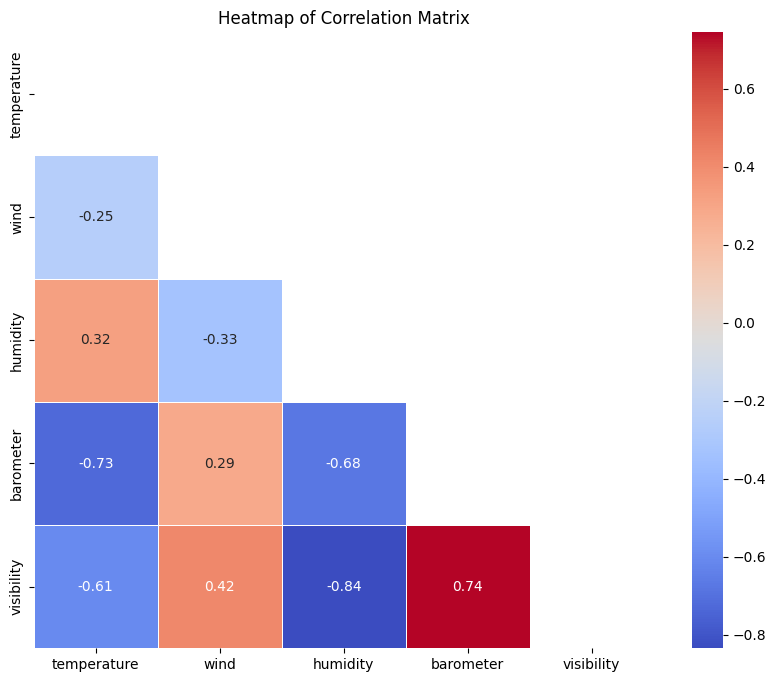

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
#1.Tiền xử lí dữ liệu
# Đọc dữ liệu từ file CSV
weather_data = pd.read_csv('weather_data.csv')

weather_data['date'] = pd.to_datetime(weather_data['date'])
weather_data['temperature'] = pd.to_numeric(weather_data['temperature'].str.replace('F', ''))
weather_data["wind"] = weather_data["wind"].replace({"No wind": np.nan}).str.replace(" mph", "").astype(float)
weather_data["humidity"] = weather_data["humidity"].str.replace("%", "").astype(float)
weather_data["barometer"] = weather_data["barometer"].str.replace(' "Hg', "").astype(float)
weather_data["visibility"] = pd.to_numeric(weather_data["visibility"].str.replace("mi", "").replace("N/A", np.nan),errors="coerce")



#2.vẽ biểu đồ tròn thể hiện tỉ lệ dữ liệu mỗi thành phố
city_counts = weather_data['city'].value_counts()
plt.figure(figsize=(10,8))
plt.pie(city_counts,labels = city_counts.index, autopct= '%1.1f%%')
plt.title('Ti le du lieu thoi tiet moi thanh pho')
plt.show()


#3. Đưa ra giá trị trung bình dữ liệu thời tiết từng thành phố và vẽ biểu đồ
# Thêm cột 'year' cho từng bản ghi để nhóm dữ liệu tính trung bình theo năm
weather_data['day'] = weather_data['date'].dt.day

# Nhóm dữ liệu và tính trung bình cho các chỉ số
daily_data = weather_data.groupby(['city', 'day']).agg({
    'temperature': 'mean',
    'wind': 'mean',
    'humidity': 'mean',
    'barometer': 'mean',
    'visibility': 'mean',
}).reset_index()

print(daily_data)

# Lấy danh sách các thành phố
cities = daily_data['city'].unique()

# Vẽ biểu đồ cho từng thành phố
for city in cities:
    city_data = daily_data[daily_data['city'] == city]

    # Tạo figure cho từng thành phố
    plt.figure(figsize=(12, 12))

    # Biểu đồ 1: Nhiệt độ trung bình hàng ngày
    plt.subplot(3, 2, 1)
    plt.plot(city_data['day'], city_data['temperature'], marker='o', color='orange')
    plt.title(f"Nhiệt độ trung bình hàng ngày - {city}")
    plt.xlabel("Ngày")
    plt.ylabel("Nhiệt độ (°F)")

    # Biểu đồ 2: Gió trung bình hàng ngày
    plt.subplot(3, 2, 2)
    plt.plot(city_data['day'], city_data['wind'], marker='o', color='blue')
    plt.title(f"Gió trung bình hàng ngày - {city}")
    plt.xlabel("Ngày")
    plt.ylabel("Gió (mph)")

    # Biểu đồ 3: Độ ẩm trung bình hàng ngày
    plt.subplot(3, 2, 3)
    plt.plot(city_data['day'], city_data['humidity'], marker='o', color='green')
    plt.title(f"Độ ẩm trung bình hàng ngày - {city}")
    plt.xlabel("Ngày")
    plt.ylabel("Độ ẩm (%)")

    # Biểu đồ 4: Áp suất trung bình hàng ngày
    plt.subplot(3, 2, 4)
    plt.plot(city_data['day'], city_data['barometer'], marker='o', color='red')
    plt.title(f"Áp suất trung bình hàng ngày - {city}")
    plt.xlabel("Ngày")
    plt.ylabel("Áp suất (\"Hg)")

    # Biểu đồ 5: Tầm nhìn trung bình hàng ngày
    plt.subplot(3, 2, 5)
    plt.plot(city_data['day'], city_data['visibility'], marker='o', color='purple')
    plt.title(f"Tầm nhìn trung bình hàng ngày - {city}")
    plt.xlabel("Ngày")
    plt.ylabel("Tầm nhìn (mi)")

    # Tinh chỉnh layout và hiển thị các biểu đồ
    plt.tight_layout(pad = 5.0)
    plt.show()

#4.Đưa ra ma trận tương quan và heatmap
hanoi_data = weather_data[weather_data['city']=='Hanoi']
correlation_matrix = hanoi_data[['temperature', 'wind', 'humidity', 'barometer', 'visibility']].corr()
print(correlation_matrix)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask = mask,annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Correlation Matrix")
plt.show()

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 0.1069 - val_loss: 0.0277
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0229 - val_loss: 0.0079
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0159 - val_loss: 0.0085
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0159 - val_loss: 0.0136
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0115 - val_loss: 0.0086
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0110 - val_loss: 0.0096
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0095 - val_loss: 0.0081
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0091 - val_loss: 0.0081
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0097 - val_loss: 0.0075
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0104 - val_loss: 0.0074
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0087 - val_loss: 0.0073
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0099 - val_loss: 0.0071
Epoch 13/50


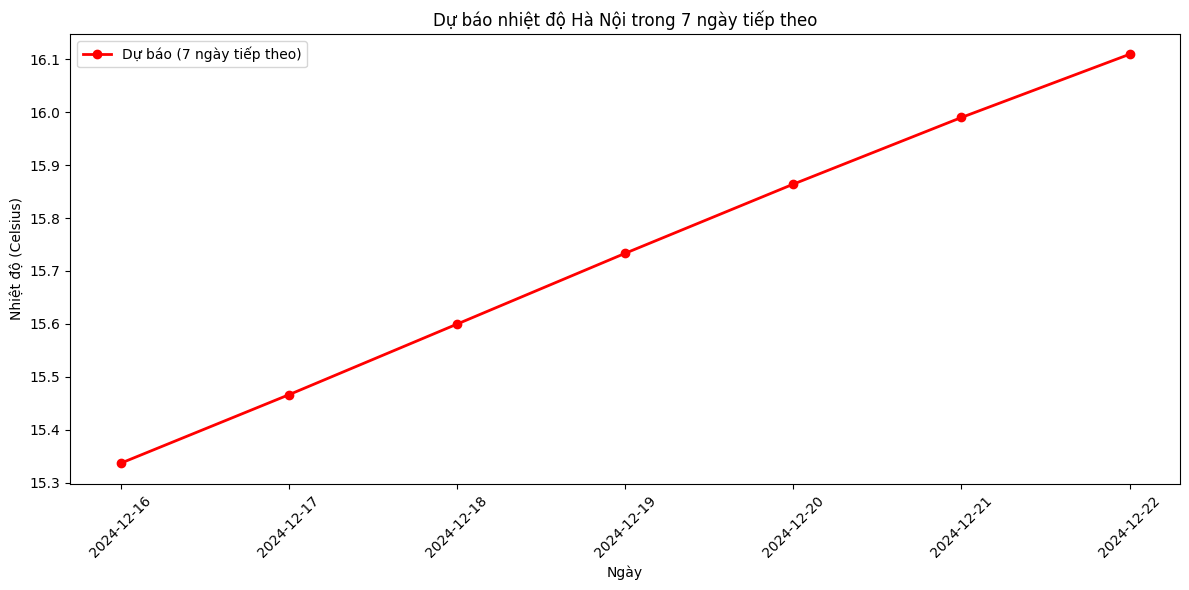

In [3]:

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# 1. Đọc dữ liệu và lọc cho thành phố Hà Nội
data = pd.read_csv("weather_data.csv", parse_dates=['date'], index_col='date')
data['temperature'] = data['temperature'].str.replace('F', '').astype(float)
data['temperature'] = (data['temperature'] - 32) * 5.0 / 9.0

hanoi_data = data[data['city'] == 'Hanoi'][['temperature']]
hanoi_data.dropna()

# Kiểm tra dữ liệu của Hà Nội và chuẩn hóa dữ liệu
if hanoi_data.empty:
    print("Không tìm thấy dữ liệu cho Hà Nội.")
else:
    scaler = MinMaxScaler(feature_range=(0, 1))
    temperature_data_scaled = scaler.fit_transform(hanoi_data)

    # 3. Chuyển đổi dữ liệu thành dạng chuỗi thời gian
    def create_sequences(data, seq_length):
        X, y = [], []
        for i in range(len(data) - seq_length):
            X.append(data[i:i + seq_length])
            y.append(data[i + seq_length])
        return np.array(X), np.array(y)

    seq_length = 30
    X, y = create_sequences(temperature_data_scaled, seq_length)



    # 4. Tách dữ liệu thành tập huấn luyện và kiểm tra
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]



    # 5. Xây dựng mô hình LSTM
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
        Dropout(0.2),
        LSTM(50, return_sequences=False),
        Dropout(0.2),
        Dense(1)
    ])



    # Huấn luyện mô hình
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)



    # 6. Dự báo 7 ngày tiếp theo
    predictions = []
    input_seq = X_test[-1]  # Bắt đầu từ chuỗi thời gian cuối cùng trong tập kiểm tra

    for _ in range(7):
        pred = model.predict(input_seq.reshape(1, seq_length, 1))
        predictions.append(pred[0, 0])
        input_seq = np.append(input_seq[1:], pred)  # Cập nhật chuỗi thời gian với dự báo mới


    predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

    print("Nhiệt độ dự báo trong 7 ngày tiếp theo (Celsius):")
    for i, temp in enumerate(predictions):
        print(f"Ngày {i+1}: {temp[0]:.2f} °C")



    y_test_actual = scaler.inverse_transform(y_test)
    rmse = np.sqrt(mean_squared_error(y_test_actual, scaler.inverse_transform(model.predict(X_test))))
    print(f"RMSE: {rmse:.2f}")


    plt.figure(figsize=(12, 6))


    forecast_dates = pd.date_range(hanoi_data.index[-1], periods=8, freq='D')[1:]


    plt.plot(forecast_dates, predictions.flatten(), label="Dự báo (7 ngày tiếp theo)", color='red', marker='o', linestyle='-', linewidth=2)

    plt.xlabel("Ngày")
    plt.ylabel("Nhiệt độ (Celsius)")
    plt.xticks(rotation=45)
    plt.legend()
    plt.title("Dự báo nhiệt độ Hà Nội trong 7 ngày tiếp theo")
    plt.tight_layout()
    plt.show()
